<a href="https://colab.research.google.com/github/miraculusik/tensorflow-deep-learning-practices/blob/main/transfer_learning_exercises_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠  Exercises

**Q1 :**Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.

**Q2 :**Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

**Q3 :**Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

**Q4 :**Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-13 18:37:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   221MB/s    in 0.7s    

2021-08-13 18:37:23 (221 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import os

for root, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in  '{root}'")

There are 2 directories and 0 files in  '10_food_classes_10_percent'
There are 10 directories and 0 files in  '10_food_classes_10_percent/test'
There are 0 directories and 250 files in  '10_food_classes_10_percent/test/sushi'
There are 0 directories and 250 files in  '10_food_classes_10_percent/test/ramen'
There are 0 directories and 250 files in  '10_food_classes_10_percent/test/steak'
There are 0 directories and 250 files in  '10_food_classes_10_percent/test/chicken_wings'
There are 0 directories and 250 files in  '10_food_classes_10_percent/test/grilled_salmon'
There are 0 directories and 250 files in  '10_food_classes_10_percent/test/chicken_curry'
There are 0 directories and 250 files in  '10_food_classes_10_percent/test/hamburger'
There are 0 directories and 250 files in  '10_food_classes_10_percent/test/fried_rice'
There are 0 directories and 250 files in  '10_food_classes_10_percent/test/pizza'
There are 0 directories and 250 files in  '10_food_classes_10_percent/test/ice_cream

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def plot_image(target_dir, class_name):

  target_folder = target_dir + class_name
  img_ = random.sample(os.listdir(target_folder), 1)[0]
  img = mpimg.imread(target_folder + "/" + img_)

  plt.imshow(img)
  plt.axis(False)
  plt.title(class_name + "\nimg shape: " + str(img.shape))

  return img

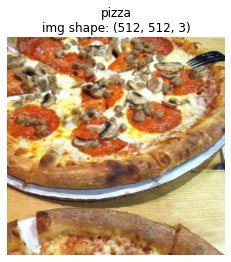

In [ ]:
img = plot_image(target_dir="10_food_classes_10_percent/train/",
                class_name= "pizza")

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir =  "10_food_classes_10_percent/train"
test_dir =  "10_food_classes_10_percent/test"

train_data = image_dataset_from_directory(train_dir,
                                          label_mode= "categorical",
                                          image_size= IMAGE_SIZE,
                                          batch_size= BATCH_SIZE)

test_data = image_dataset_from_directory(test_dir,
                                         label_mode= "categorical",
                                         image_size= IMAGE_SIZE,
                                         batch_size= BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
class_names = train_data.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
import tensorflow as tf

check_path = "models_checkpoint_weights/model_q2/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath= check_path,
                                                         save_freq= "epoch",
                                                         save_weights_only= True,
                                                         save_best_only= False,
                                                         verbose=1)

In [ ]:
#base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#create model
inputs = tf.keras.layers.Input(shape=IMAGE_SIZE+(3,), name="input_layer")

x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_q2 = tf.keras.Model(inputs, outputs)

#compile model
model_q2.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#fit model
history_q2 = model_q2.fit(train_data,
                          epochs=10,
                          steps_per_epoch= len(train_data),
                          validation_data= test_data,
                          validation_steps= int(0.25*len(test_data)),
                          callbacks=[checkpoint_callback])

16711680/16705208 [==============================] - 0s 0us/step
Epoch 1/10
24/24 [==============================] - 41s 275ms/step - loss: 1.9050 - accuracy: 0.3800 - val_loss: 1.3506 - val_accuracy: 0.7171

Epoch 00001: saving model to models_checkpoint_weights/model_q2/checkpoint.ckpt
Epoch 2/10
24/24 [==============================] - 5s 196ms/step - loss: 1.1408 - accuracy: 0.7520 - val_loss: 0.9458 - val_accuracy: 0.7878

Epoch 00002: saving model to models_checkpoint_weights/model_q2/checkpoint.ckpt
Epoch 3/10
24/24 [==============================] - 5s 192ms/step - loss: 0.8285 - accuracy: 0.8067 - val_loss: 0.7593 - val_accuracy: 0.8174

Epoch 00003: saving model to models_checkpoint_weights/model_q2/checkpoint.ckpt
Epoch 4/10
24/24 [==============================] - 5s 192ms/step - loss: 0.6807 - accuracy: 0.8293 - val_loss: 0.6637 - val_accuracy: 0.8339

Epoch 00004: saving model to models_checkpoint_weights/model_q2/checkpoint.ckpt
Epoch 5/10
24/24 [========================

In [ ]:
model_q2_loss, model_q2_accuracy = model_q2.evaluate(test_data)
print("model_q2 loss:", model_q2_loss)
print("model_q2 accuracy:", model_q2_accuracy)

79/79 [==============================] - 9s 110ms/step - loss: 0.4978 - accuracy: 0.8504
model_q2 loss: 0.49778538942337036
model_q2 accuracy: 0.8503999710083008


## **Q2 :**

Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [ ]:
# trainable last 20 layer of the base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable= True

for layer in base_model.layers[:-20]:
  layer.trainable= False

In [ ]:
#Create model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x= base_model(inputs)
x= tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_q3 = tf.keras.Model(inputs, outputs)

In [ ]:
#load weights from checkpoint of model_2
model_q3.load_weights(check_path)

In [ ]:
#compile model
model_q3.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=["accuracy"])

#fit model
history_q3 = model_q3.fit(train_data,
                          epochs=20,
                          initial_epoch= history_q2.epoch[-1],
                          steps_per_epoch= len(train_data),
                          validation_data= test_data,
                          validation_steps= int(0.25*len(test_data)))

Epoch 10/20
24/24 [==============================] - 13s 254ms/step - loss: 0.7171 - accuracy: 0.7627 - val_loss: 1.2504 - val_accuracy: 0.7730
Epoch 11/20
24/24 [==============================] - 5s 204ms/step - loss: 0.1983 - accuracy: 0.9333 - val_loss: 1.6286 - val_accuracy: 0.7829
Epoch 12/20
24/24 [==============================] - 5s 206ms/step - loss: 0.0753 - accuracy: 0.9800 - val_loss: 1.0094 - val_accuracy: 0.8322
Epoch 13/20
24/24 [==============================] - 5s 208ms/step - loss: 0.0425 - accuracy: 0.9907 - val_loss: 0.8063 - val_accuracy: 0.8339
Epoch 14/20
24/24 [==============================] - 5s 199ms/step - loss: 0.0253 - accuracy: 0.9947 - val_loss: 0.5604 - val_accuracy: 0.8668
Epoch 15/20
24/24 [==============================] - 5s 197ms/step - loss: 0.0240 - accuracy: 0.9947 - val_loss: 0.6616 - val_accuracy: 0.8536
Epoch 16/20
24/24 [==============================] - 5s 199ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.5381 - val_accuracy: 0.850

In [ ]:
model_q3_loss, model_q3_accuracy = model_q3.evaluate(test_data)
print("model_q3 loss: ",model_q3_loss)
print("model_q3 accuracy: ",model_q3_accuracy)

79/79 [==============================] - 9s 107ms/step - loss: 0.5876 - accuracy: 0.8408
model_q3 loss:  0.5876117944717407
model_q3 accuracy:  0.8407999873161316


## **Q3 :**

Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [ ]:
# trainable last 30 layer of the base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable= True

for layer in base_model.layers[:-30]:
  layer.trainable= False

In [ ]:
#Create model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x= base_model(inputs)
x= tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_q4 = tf.keras.Model(inputs, outputs)

#load weights from checkpoint of model_2
model_q4.load_weights(check_path)

#compile model
model_q4.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=["accuracy"])

#fit model
history_q4 = model_q3.fit(train_data,
                          epochs=20,
                          initial_epoch= history_q2.epoch[-1],
                          steps_per_epoch= len(train_data),
                          validation_data= test_data,
                          validation_steps= int(0.25*len(test_data)))

Epoch 10/20
24/24 [==============================] - 5s 206ms/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.5650 - val_accuracy: 0.8470
Epoch 11/20
24/24 [==============================] - 5s 200ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.5913 - val_accuracy: 0.8668
Epoch 12/20
24/24 [==============================] - 5s 200ms/step - loss: 0.0059 - accuracy: 0.9987 - val_loss: 0.5880 - val_accuracy: 0.8635
Epoch 13/20
24/24 [==============================] - 5s 198ms/step - loss: 0.0069 - accuracy: 0.9973 - val_loss: 0.5391 - val_accuracy: 0.8618
Epoch 14/20
24/24 [==============================] - 5s 198ms/step - loss: 0.0076 - accuracy: 0.9987 - val_loss: 0.5828 - val_accuracy: 0.8405
Epoch 15/20
24/24 [==============================] - 5s 197ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.5351 - val_accuracy: 0.8569
Epoch 16/20
24/24 [==============================] - 5s 197ms/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.4246 - val_accuracy: 0.8766

In [ ]:
model_q4_loss, model_q4_accuracy = model_q4.evaluate(test_data)
print("model_q4 loss: ",model_q4_loss)
print("model_q4 accuracy: ",model_q4_accuracy)

79/79 [==============================] - 10s 103ms/step - loss: 0.4978 - accuracy: 0.8504
model_q4 loss:  0.49778538942337036
model_q4 accuracy:  0.8503999710083008


## **Q4 :** 

Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

In [ ]:
def predict_image(data_dir, target_class, model):
  target_dir = data_dir + target_class
  sel_img = random.sample(os.listdir(target_dir), 1)[0]

  img_path = tf.io.read_file(target_dir + "/" + sel_img)
  img = tf.io.decode_image(img_path)
  plt.imshow(img)
  plt.axis(False)
  img = tf.image.resize(img, size=(224, 224))
  img = tf.cast(img, dtype=tf.float32)
  img = tf.expand_dims(img, axis=0)
  pred = model.predict(img)
  pred_class = class_names[np.argmax(pred)]

  if target_class == pred_class:
    color="green"
  else:
    color="red"
  
  plt.title("True Class: " + target_class + "\nPredicted Class: " + pred_class, color=color)
  plt.tight_layout()
  return pred

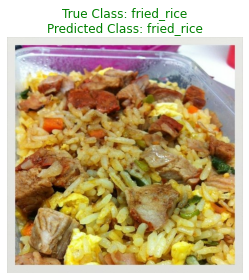

In [ ]:
pred = predict_image("10_food_classes_10_percent/test/", "fried_rice", model_q2)